In [7]:
import sys
sys.path.append("../")
mmseg_path = "../../submodules/mmsegmentation/"
sys.path.append(mmseg_path)
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
def load_json_log(log_path):
    log_dict = dict()

    with open(log_path) as log_file:
        for line in log_file:
            log = json.loads(line.strip())
            # the final step in json file is 0.
            if 'step' in log and log['step'] != 0:
                step = log['step']
                prev_step = step
            else:
                step = prev_step
            if step not in log_dict:
                log_dict[step] = defaultdict(list)
            for k, v in log.items():
                log_dict[step][k].append(v)
    
    return log_dict

def plot_curve(log_dict, keys=['mIoU','mAcc','aAcc'], title="Log Report"):

    legend = keys

    metrics = keys
    num_metrics = len(metrics)
    epochs = list(log_dict.keys())

    for j, metric in enumerate(metrics):
        plot_epochs = []
        plot_iters = []
        plot_values = []
        for epoch in epochs:
            epoch_logs = log_dict[epoch]
            epoch_keys = epoch_logs.keys()
            if metric not in epoch_logs.keys():
                continue
            if metric in ['mIoU', 'mAcc', 'aAcc']:
                plot_epochs.append(epoch)
                plot_values.append(epoch_logs[metric][0])
            else:
                for idx in range(len(epoch_logs[metric])):
                    plot_iters.append(epoch_logs['step'][idx])
                    plot_values.append(epoch_logs[metric][idx])
    
        ax = plt.gca()
        label = legend[j]
        if metric in ['mIoU', 'mAcc', 'aAcc']:
            ax.set_xticks(plot_epochs)
            plt.xlabel('step')
            plt.plot(plot_epochs, plot_values, label=label, marker='o')
        else:
            plt.xlabel('iter')
            plt.plot(plot_iters, plot_values, label=label, linewidth=0.5)
    plt.legend()
    plt.title(title)
    plt.show()

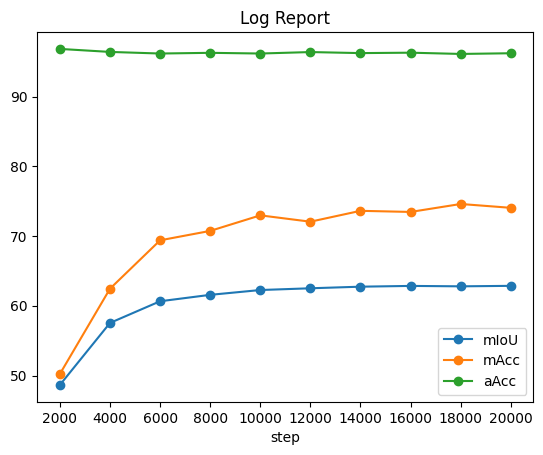

In [9]:
#log for original model
# log_path = "/home/david/rad-nav/submodules/lib-avstack-core/third_party/mmsegmentation/work_dirs/radcloud_original/radcloud_original/vis_data/20231114_144538.json"

#log for data augmentation
# log_path = "/home/david/rad-nav/submodules/lib-avstack-core/third_party/mmsegmentation/work_dirs/radcloud_original_rand_flip/20231115_140650/vis_data/20231115_140650.json"

#log for interpolated convolution
# log_path = "/home/david/rad-nav/submodules/lib-avstack-core/third_party/mmsegmentation/work_dirs/radcloud_original_interpConv/20231115_183248/vis_data/20231115_183248.json"

#log for radcloud unet with deeplabv3 decoder
# log_path = "/home/david/rad-nav/submodules/lib-avstack-core/third_party/mmsegmentation/work_dirs/radcloud_deeplabv3/20231115_211825/vis_data/20231115_211825.json"

#log for radcloud with smaller ASPP decoder size
# log_path = "/home/david/rad-nav/submodules/lib-avstack-core/third_party/mmsegmentation/work_dirs/radcloud_deeplabv3_resnetv1c_80kiter/20231116_174319/vis_data/20231116_174319.json"

log_path = "/home/david/rad-nav/submodules/lib-avstack-core/third_party/mmsegmentation/work_dirs/radcloud_short_range/20231201_163421/vis_data/20231201_163421.json"
log_dict = load_json_log(log_path)

plot_curve(log_dict)